Enter the number of frames:  4
Enter the page reference string (space-separated):  1 3 5 7


Page sequence: [1, 3, 5, 7]
Page hits: 0
Page faults: 4
Hit ratio: 0.00
Fault ratio: 1.00


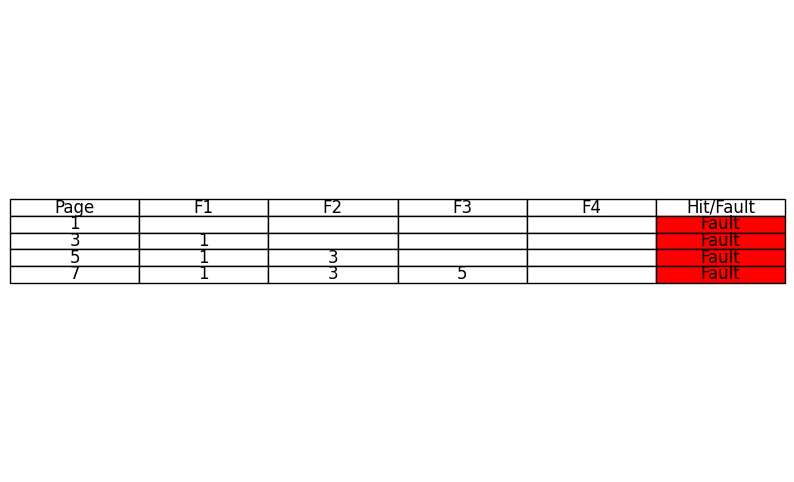

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class FILOPageReplacement:
    def __init__(self, num_frames):
        self.num_frames = num_frames
        self.frames = []
        self.page_faults = 0
        self.page_hits = 0
        self.page_sequence = []
        self.page_steps = []

    def access_page(self, page):
        step = {"Page": page, "Hit/Fault": "Fault"}
        
        # Track the current state of frames
        frame_state = list(self.frames)
        
        if page in self.frames:
            # Page hit
            self.page_hits += 1
            step["Hit/Fault"] = "Hit"
            self.page_steps.append((page, frame_state, "Hit"))
            return
        
        # Page fault: add the page or replace the most recently added page
        if len(self.frames) < self.num_frames:
            self.frames.append(page)
        else:
            self.frames.pop()  # Remove the last added page
            self.frames.append(page)
        
        self.page_faults += 1
        self.page_steps.append((page, frame_state, "Fault"))

    def simulate(self, page_sequence):
        self.page_sequence = page_sequence
        for page in page_sequence:
            self.access_page(page)

    def print_results(self):
        print(f"Page sequence: {self.page_sequence}")
        print(f"Page hits: {self.page_hits}")
        print(f"Page faults: {self.page_faults}")
        print(f"Hit ratio: {self.page_hits / len(self.page_sequence):.2f}")
        print(f"Fault ratio: {self.page_faults / len(self.page_sequence):.2f}")

    def display_table(self):
        # Create DataFrame with steps for displaying
        data = []
        for page, frame_state, hit_fault in self.page_steps:
            row = {'Page': page}
            for i in range(self.num_frames):
                row[f"F{i+1}"] = frame_state[i] if i < len(frame_state) else ""
            row['Hit/Fault'] = hit_fault
            data.append(row)

        df = pd.DataFrame(data)
        cmap = ListedColormap(['red', 'white'])
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')
        table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        for i, (page, frame_state, hit_fault) in enumerate(self.page_steps):
            for j in range(self.num_frames):
                if hit_fault == "Fault" and j < len(frame_state) and frame_state[j] == page:
                    table[(i + 1, j + 1)].set_facecolor(cmap(0))
                else:
                    table[(i + 1, j + 1)].set_facecolor(cmap(1))
            table[(i + 1, self.num_frames + 1)].set_facecolor(cmap(1 if hit_fault == "Hit" else 0))
        plt.show()

# Get user input for the simulation
num_frames = int(input("Enter the number of frames: "))
page_sequence_input = input("Enter the page reference string (space-separated): ")
page_sequence = list(map(int, page_sequence_input.split()))

# Initialize the FILO Page Replacement
filo = FILOPageReplacement(num_frames)

# Simulate the page replacement
filo.simulate(page_sequence)

# Print results
filo.print_results()

# Display the table showing the page replacement process
filo.display_table()
